In [57]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# 1. Loading the data into the pandas environment and identify some basic details of the dataset

In [58]:
# Read the dataset
Data = pd.read_csv('employee.csv')
Data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [59]:
# Display the data types
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [60]:
# Summary of statistics
Data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [61]:
# Check null values
Data.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 2. Reset the index as "name"

In [62]:
# Read the dataset and reset the index as name
DataIndex = pd.read_csv('employee.csv', index_col="name")
DataIndex

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills

In [63]:
DataIndex.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”


In [64]:
DataIndex[DataIndex['department'].isin(['Sales', 'Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employees who has more than 700 performance score

In [65]:
DataIndex.loc[DataIndex['performance_score'] > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6.  Display employees who has more than 500 and less than 700 performance score


In [66]:
DataIndex[(DataIndex['performance_score'] > 500) & (DataIndex['performance_score'] < 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset

In [67]:
# Checking the missing values using isnull() function 
DataIndex.isnull()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,False,True,True,False,False,False
S Kumar,True,False,False,False,False,False
Jack Morgan,False,False,False,False,False,False
Ying Chin,False,False,False,False,False,False
Dheeraj Patel,False,False,False,False,False,False
Satyam Sharma,True,False,True,False,False,False
James Authur,False,True,False,False,False,False
Josh Wills,False,False,False,False,False,False
Leo Duck,False,False,False,False,False,False


In [68]:
# No. of Missing values in each columns
DataIndex.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

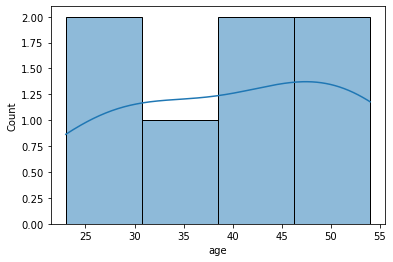

In [34]:
sns.histplot(data= DatIndex, x='age',kde=True)


<AxesSubplot:xlabel='income', ylabel='Count'>

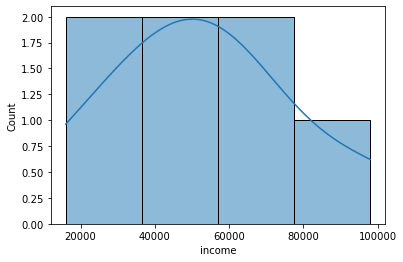

In [69]:
sns.histplot(data= DataIndex, x='income',kde=True)

Both age and income does not belongs to normal distribution. Hence, we can use median to fill age and income here.

In [70]:
for i in ['age','income']:
    DataIndex[i] = DataIndex[i].fillna(DataIndex[i].median())

In [39]:
DataIndex

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [71]:
# Handling missing Genders using fillna method
DataIndex['gender'] = DataIndex['gender'].fillna('Not mentioned')

In [42]:
DataIndex

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,Not mentioned,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,Not mentioned,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [72]:
# Final check to make sure that Null values are handled properly
DataIndex.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles

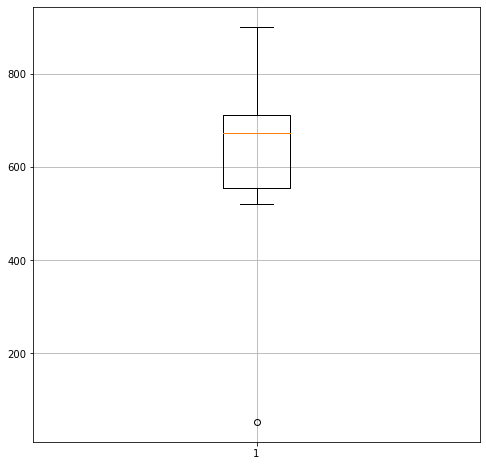

In [73]:
plt.figure(figsize=(8,8))
plt.boxplot(DataIndex["performance_score"])
plt.grid();

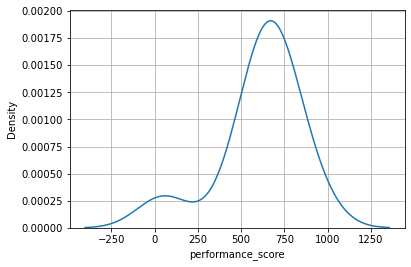

In [74]:
sns.kdeplot(DataIndex["performance_score"])
plt.grid()

In [76]:
DataIndex["performance_score"].skew()

-1.7947713470359914

In [77]:
Q1 = np.percentile(DataIndex["performance_score"],25)
Q2 = np.percentile(DataIndex["performance_score"],50)
Q3 = np.percentile(DataIndex["performance_score"],75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"The first Quartile = {Q1},\nThe Second Quartile = {Q2}, \nThe Third Quartile = {Q3}, \nIQR = {IQR}, \n\nlower limit = {lower_limit},\nupper limit = {upper_limit}")

outlier = []
for x in DataIndex["performance_score"]:
    if (x < lower_limit) or (x > upper_limit):
        outlier.append(x)
print(f"\nThe outliers are = {outlier}")

index_dropped = DataIndex[(DataIndex["performance_score"] < lower_limit) | (DataIndex["performance_score"] > upper_limit)].index
DataIndex.drop(index_dropped,inplace=True)
DataIndex

The first Quartile = 556.0,
The Second Quartile = 674.0, 
The Third Quartile = 711.0, 
IQR = 155.0, 

lower limit = 323.5,
upper limit = 943.5

The outliers are = [53]


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,Not mentioned,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,Not mentioned,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


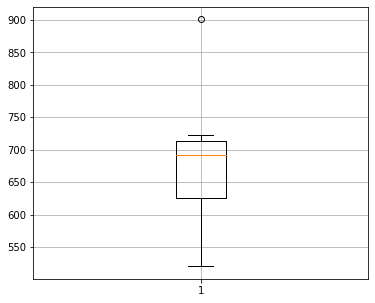

In [78]:
plt.figure(figsize=(6,5))
plt.boxplot(DataIndex["performance_score"])
plt.grid();

We have now cleared the outliers in the performance score feature using percentiles

# 9. Check the gender column and do Dummy encoding

In [79]:
Dat = DataIndex
Dummy_Dat = pd.get_dummies(Dat, columns=["gender"])
Dummy_Dat

,age,income,department,grade,performance_score,gender_F,gender_M,gender_Not mentioned
name,,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0,0,1
S Kumar,45.0,16000.0,Finance,G0,520,1,0,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1,0
Ying Chin,45.0,65000.0,Sales,G3,556,1,0,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,0,0,1
Josh Wills,54.0,52000.0,Finance,G3,901,1,0,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1,0


# 10. Do the standard scaling on the feature performance score


In [80]:
Col_names = ["age","income","department","grade",'performance_score',"gender_F","gender_M"]
Features = Dummy_Dat[Col_names]

# Column transforming
CT = ColumnTransformer([('somename', StandardScaler(), ['performance_score'])], remainder='passthrough')

CT.fit_transform(Features)
# Transforming the array back into Data Frame.
DataSet = pd.DataFrame(CT.fit_transform(Features))

# Re-assigning the column names and index names
DataSet.columns = ['performance_score',"age","income","department","grade","gender_F","gender_M"]
DataSet.index = ["Allen Smith","S Kumar","Jack Morgan","Ying Chin","Dheeraj Patel","Satyam Sharma","Josh Wills","Leo Duck"]
DataSet

,performance_score,age,income,department,grade,gender_F,gender_M
Allen Smith,0.392262,45.0,52000.0,Operations,G3,0,0
S Kumar,-1.475872,45.0,16000.0,Finance,G0,1,0
Jack Morgan,-0.058667,32.0,35000.0,Finance,G2,0,1
Ying Chin,-1.144578,45.0,65000.0,Sales,G3,1,0
Dheeraj Patel,0.281831,30.0,42000.0,Operations,G2,1,0
Satyam Sharma,-0.288733,45.0,62000.0,Sales,G3,0,0
Josh Wills,2.030331,54.0,52000.0,Finance,G3,1,0
Leo Duck,0.263425,23.0,98000.0,Sales,G4,0,1


We have performed Standard Scaling based on the feature Performance score